# Exercise 01 : Line chart with styles

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [3]:
query = """
SELECT datetime
FROM pageviews
WHERE uid LIKE 'user_%'
"""
pageviews = pd.io.sql.read_sql(query, con, parse_dates=['datetime'])
pageviews = pageviews.groupby(by=pageviews['datetime'].dt.date).agg({'datetime': ['count']})
pageviews = pageviews.reset_index()
pageviews.columns = ['date', 'views']
pageviews

,date,views
0,2020-04-17,1
1,2020-04-18,23
2,2020-04-19,15
3,2020-04-21,3
4,2020-04-22,1
5,2020-04-23,5
6,2020-04-25,1
7,2020-04-26,8
8,2020-04-28,2
9,2020-04-29,4


In [4]:
query = """
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
"""
checker = pd.io.sql.read_sql(query, con, parse_dates=['timestamp'])
checker = checker.groupby(by=checker['timestamp'].dt.date).agg({'timestamp': ['count']})
checker = checker.reset_index()
checker.columns = ['date', 'commits']
checker

,date,commits
0,2020-04-17,23
1,2020-04-18,69
2,2020-04-19,33
3,2020-04-20,25
4,2020-04-21,25
5,2020-04-22,28
6,2020-04-23,43
7,2020-04-24,16
8,2020-04-25,104
9,2020-04-26,261


In [5]:
df = pd.merge(left=pageviews, right=checker, on='date', how='inner')
df

,date,views,commits
0,2020-04-17,1,23
1,2020-04-18,23,69
2,2020-04-19,15,33
3,2020-04-21,3,25
4,2020-04-22,1,28
5,2020-04-23,5,43
6,2020-04-25,1,104
7,2020-04-26,8,261
8,2020-04-28,2,5
9,2020-04-29,4,17


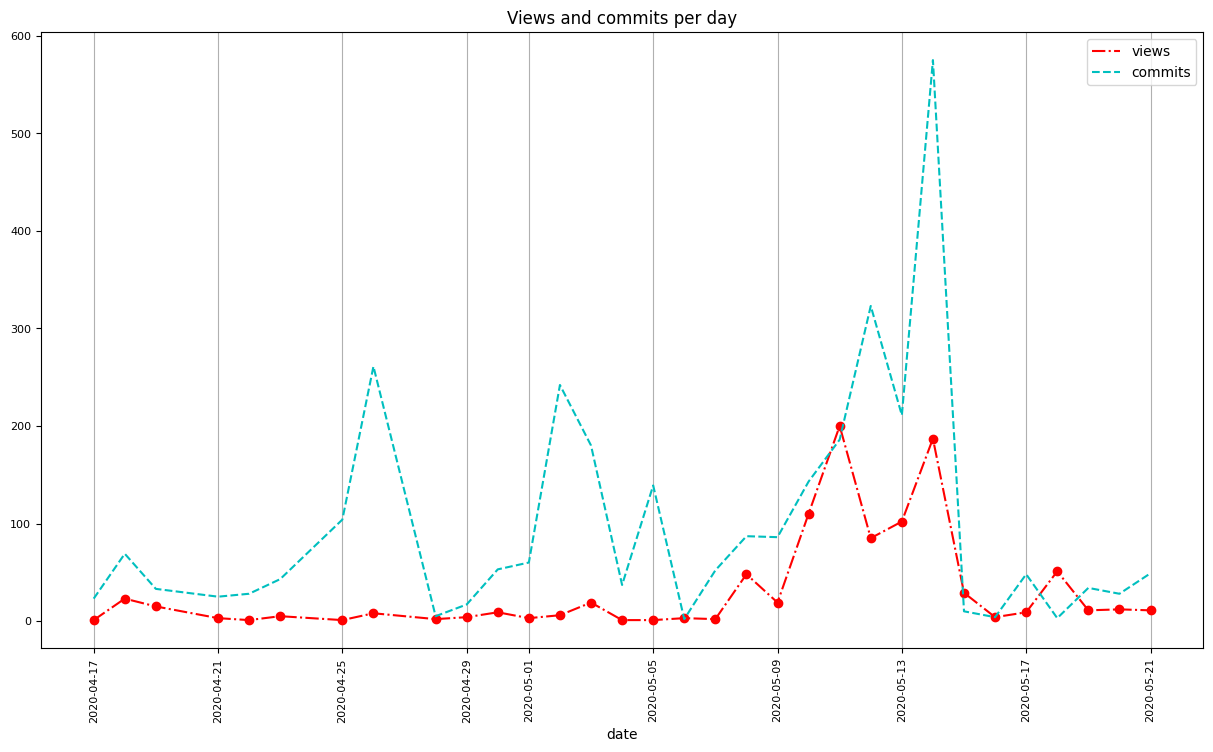

In [6]:
plot = df.plot(x='date',
        y=['views', 'commits'],
        fontsize=8, 
        figsize=(15, 8),
        title='Views and commits per day',
        rot=90,
        style=['-.', '--'],
        color=['r', 'c'],
        )
plot.get_lines()[0].set_marker('o')
plot.grid(axis='x')

## How many times was the number of views larger than 150?

In [7]:
print(df[df['views'] > 150]['views'].count())

2


## The answer is __2__

In [8]:
con.close()